In [1]:
import scale.olm as olm
import json
import matplotlib.pyplot as plt

In [2]:
prefix = "data/mox_w17x17-e10v50"

# Load data.
with open(prefix + ".ii.json","r") as f:
    data = json.load(f)
ii = olm.core.InventoryInterface(data)
with open(prefix + "_ORIGAMI.ii.json","r") as f:
    data = json.load(f)
ii_origami = olm.core.InventoryInterface(data)

In [3]:
# Available cases for TRITON.
ii.names()

dict_keys(['case(-1)', 'case(-2)', 'case(0)', 'case(1)', 'case(11)', 'case(21)', 'case(31)'])

In [5]:
mapping = {'system': 'case(-2)', 'fuel 1': 'case(1)', 'fuel 11': 'case(11)', 'fuel 21': 'case(21)', 'fuel 31': 'case(31)'}
ni={}
for k,v in mapping.items():
    ni[k] = ii.nuclide_inventory(v)

nuclide: pu239


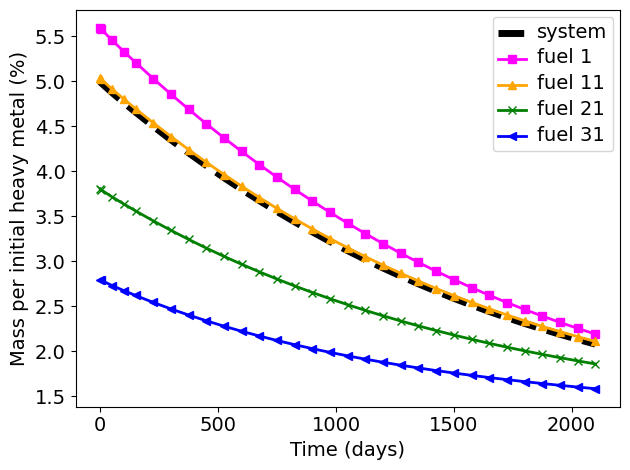

nuclide: pu239


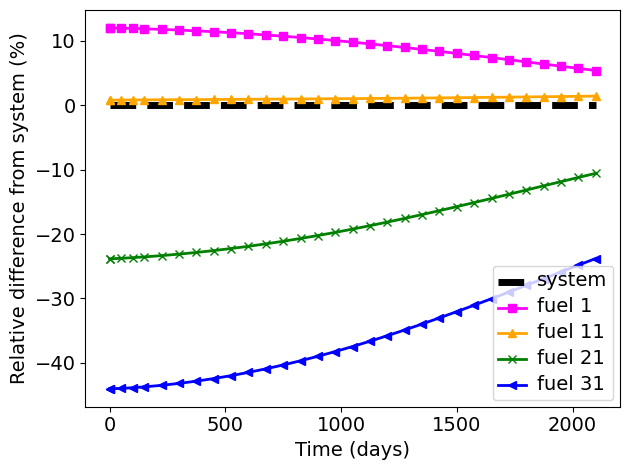

nuclide: pu240


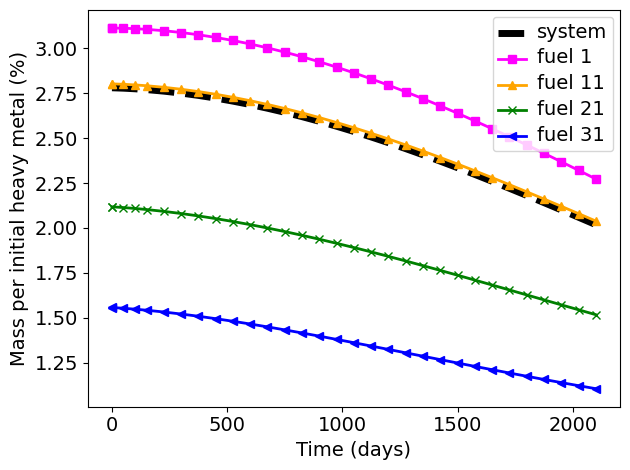

nuclide: pu240


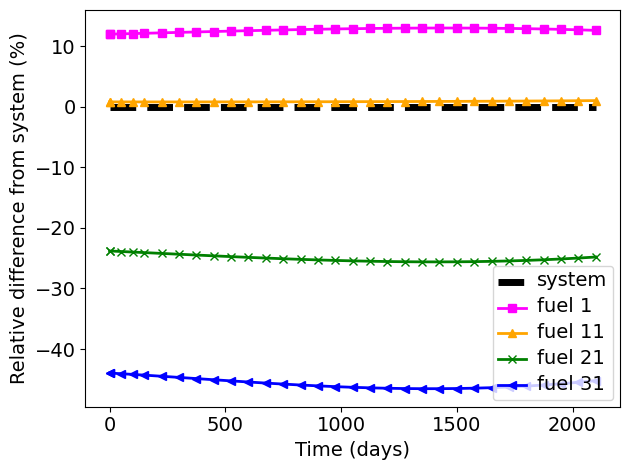

nuclide: pu241


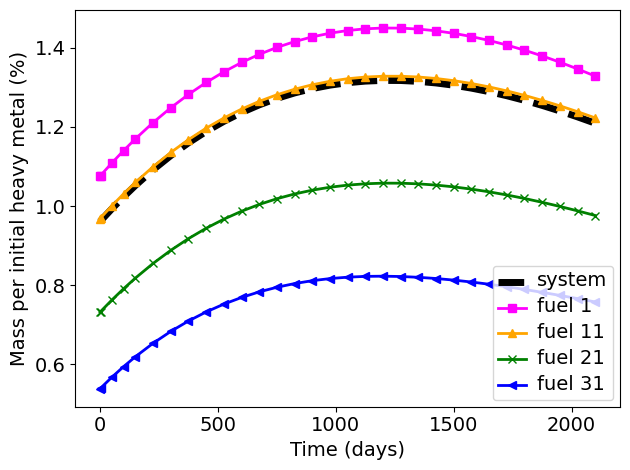

nuclide: pu241


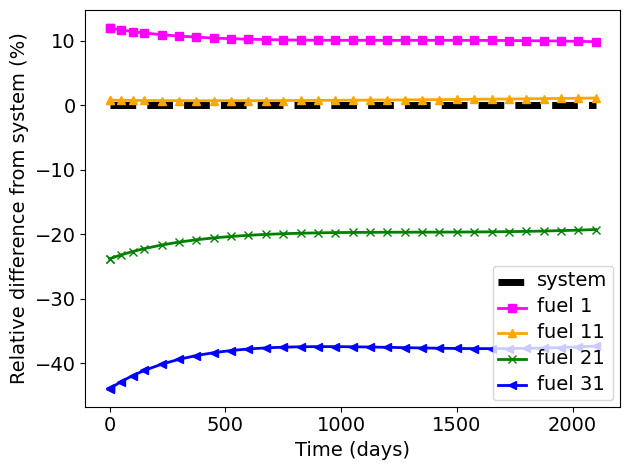

In [32]:
nuclides = ['pu239','pu240','pu241']
plotstuff = {'system': {'linewidth': 5, 'linestyle': '--', 'color': 'black'}, 
             'fuel 1': {'linewidth': 2, 'marker': 's', 'color': 'magenta'}, 
             'fuel 11': {'linewidth': 2, 'marker': '^', 'color': 'orange'}, 
             'fuel 21': {'linewidth': 2, 'marker': 'x', 'color': 'green'}, 
             'fuel 31': {'linewidth': 2, 'marker': '<', 'color': 'blue'}, 
             'fuel 41': {'linewidth': 2, 'marker': '>', 'color': 'purple'}, 
            }
# Gather the data.
for n in nuclides:
    a={}
    for k in mapping:
        a[k]=ni[k].plot_nuclide_amounts([n])
        plt.close()
    # Make relative to initial.
    c={}
    for k in mapping:
        c[k] = a[k][n]/ni[k].get_hm_mass()

    # Make the plots.
    for k in mapping:
        plt.plot(ni[k].time/86400.,100*c[k],**plotstuff[k],label=k)
    plt.ylabel('Mass per initial heavy metal (%)')
    plt.xlabel('Time (days)')
    plt.legend()
    print('nuclide:',n)
    olm.contrib.change_plot_font_size(plt.gca(),14)
    plt.tight_layout()
    plt.savefig(prefix+'_'+n+'_mix.pdf', bbox_inches = "tight")
    plt.show()
    
    for k in mapping:
        plt.plot(ni[k].time/86400.,100*(c[k]/c['system']-1),**plotstuff[k],label=k)
    plt.ylabel('Relative difference from system (%)')
    plt.xlabel('Time (days)')
    plt.legend()
    print('nuclide:',n)
    olm.contrib.change_plot_font_size(plt.gca(),14)
    plt.tight_layout()
    plt.savefig(prefix+'_'+n+'_reldiff-mix.pdf', bbox_inches = "tight")
    plt.show()

In [33]:
ni_origami = ii_origami.nuclide_inventory('case(1)')

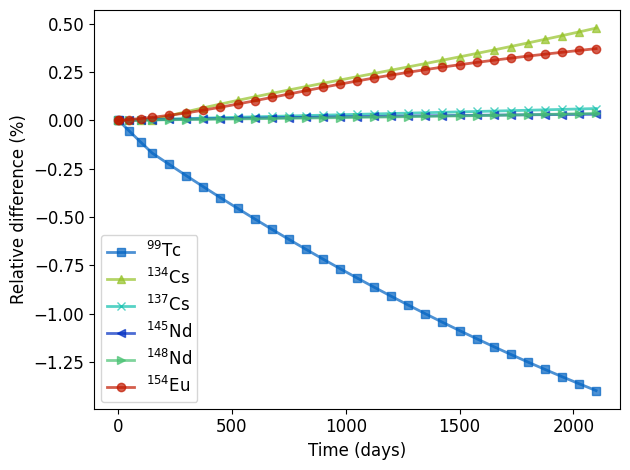

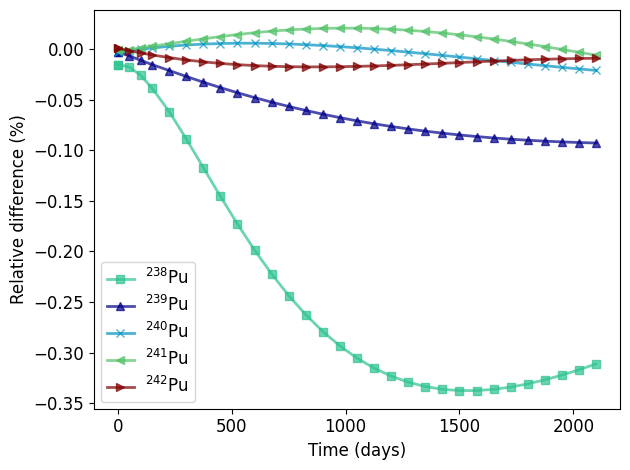

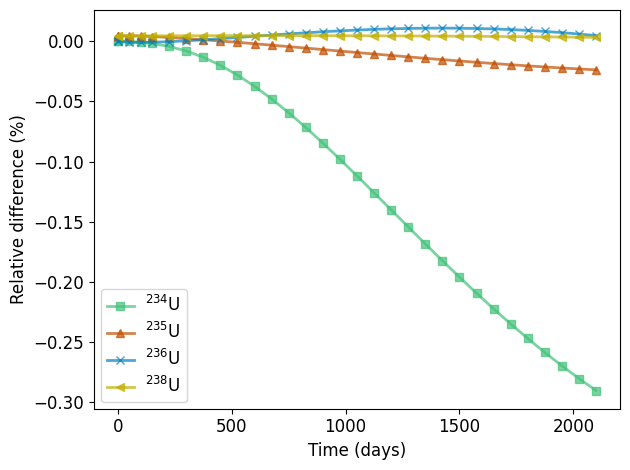

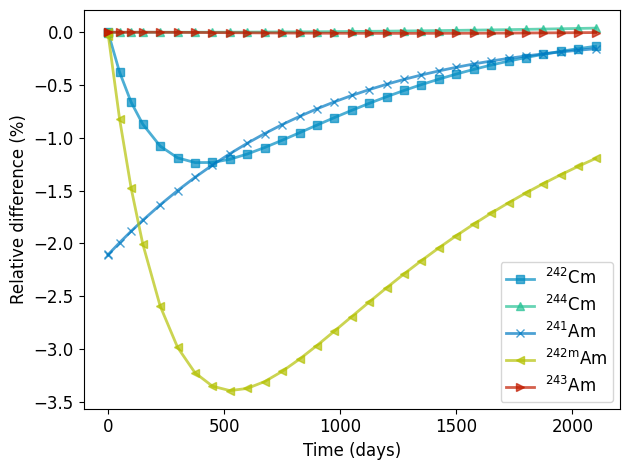

In [34]:
import numpy as np
b={}
plot_sets = {
    'fp': ['tc99', 'cs134','cs137','nd145','nd148','eu154'],
    'pu': ["pu238","pu239","pu240","pu241","pu242"],
    'u': ['u234','u235','u236','u238'],
    'ma': ['cm242','cm244','am241','am242m','am243']
}
markers=['','s','^','x','<','>','o']
nt = len(ni_origami.time)
for k,v in plot_sets.items():
    i=0
    for n in v:
        b[n] = ni_origami.wrel_diff(n,ni['system'])
        label = ni_origami._nice_label(n)
        color =ni_origami._nuclide_color(ni['system'].composition_manager.izzzaaa(n))
        dark_color = [*color[0:3]*0.8,1.0]
        time = ni_origami.time/86400
        i+=1
        plt.plot(time,100*b[n],
                 label = label, 
                 linewidth=2, 
                 color=dark_color, alpha=0.7, marker=markers[i] )
    plt.legend()
    plt.ylabel('Relative difference (%)')
    plt.xlabel('Time (days)')
    olm.contrib.change_plot_font_size(plt.gca(),12)
    plt.tight_layout()
    plt.savefig(prefix+'_'+k+'_reldiff-system.pdf',  bbox_inches = "tight")
    plt.show()